In [9]:
### Start with kernel withr 
import warnings
warnings.filterwarnings('ignore')
import os
import rpy2.rinterface
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [10]:
os.environ.get("R_HOME")
#os.environ['R_HOME'] = '/usr/lib/R'
%load_ext rpy2.ipython

'ggplot2','tools','stats','graphics',...,'utils','datasets','methods','base'


In [11]:
np.random.seed(42)
# Make a pandas DataFrame
df = pd.DataFrame(np.random.normal(0,1,size=(100, 3)), columns=list('ABC'))
df['C'] = df['C'] + 2

In [12]:
%R librarian::shelf(tidyverse)

array([1], dtype=int32)

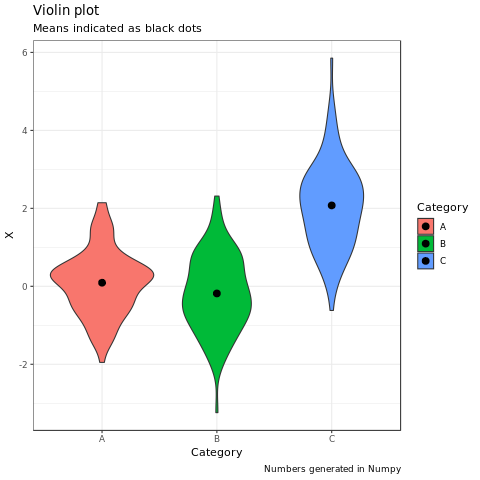

In [13]:
%%R -i df
df %>% 
  gather("Category", "X") %>%
  ggplot(aes(x = Category, y = X, fill = Category)) +
    geom_violin() +
    stat_summary(fun.y=mean, color='black', geom='point', size = 3) +
    labs(title = "Violin plot",
         subtitle = "Means indicated as black dots",
         captions = "Numbers generated in Numpy") +
    theme_bw()